# 3. Historical Design Model


### Required inputs:
- Soils
- Stage-Storage
- Historical Climate
- Calibration Data
- model parameters

Note: As a starting point, you should use the solver-derived model fit parameters from the 1. Historical Model. They can be found in results\data\\"site"_model_params_hist.csv. Copy and paste each value to the main_inputs_designs.csv. They can be tweaked as appropriate for a particular design scenario. 


### Results: 
- Model Data
- Model Parameters
- Timeseries

To run, specify the filename of your main_inputs_design_hist file (allows you to maintain multiple version of the file if desired). 
Make sure you have the entire python repo in the same folder as this notebook file (inputs, results, pondit folders, etc.)

Eagle_lowerspillway
Eagle_lesscapacity
CHB-03_nogroundwater
CHB-03_lowerspillway


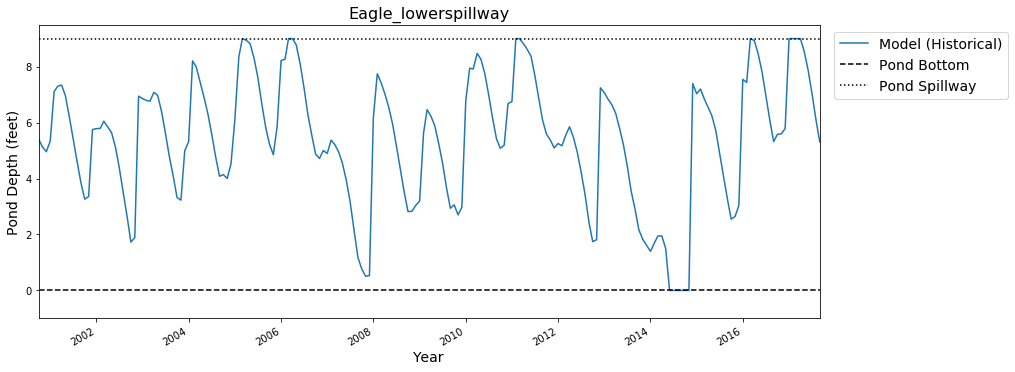

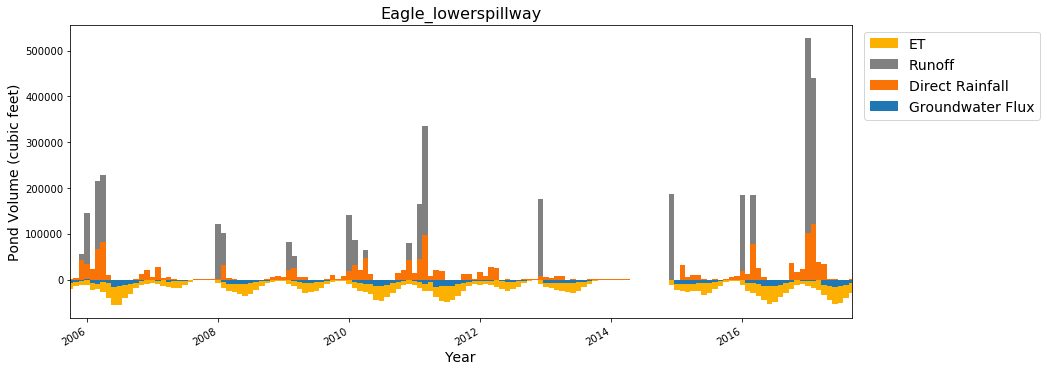

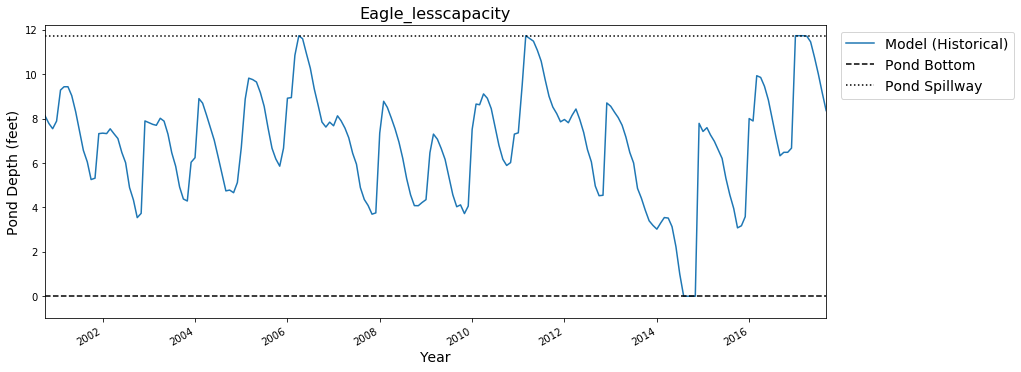

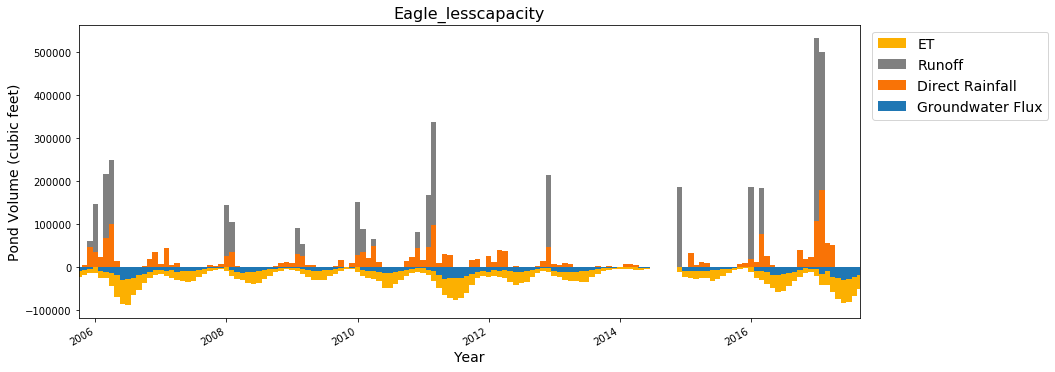

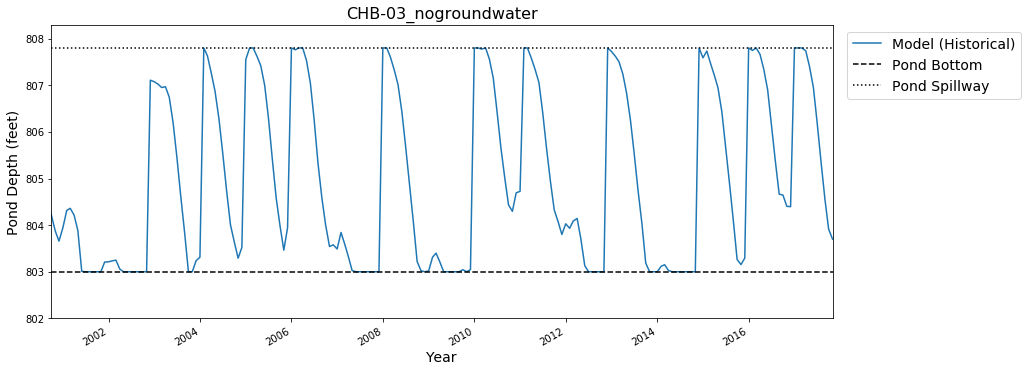

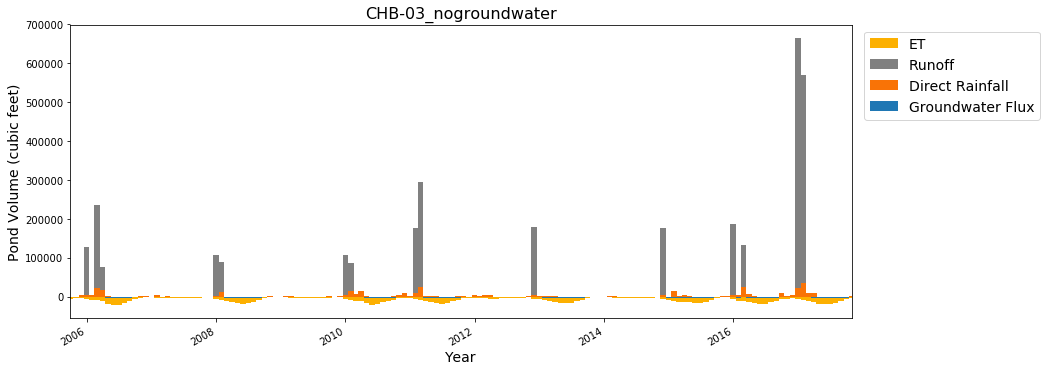

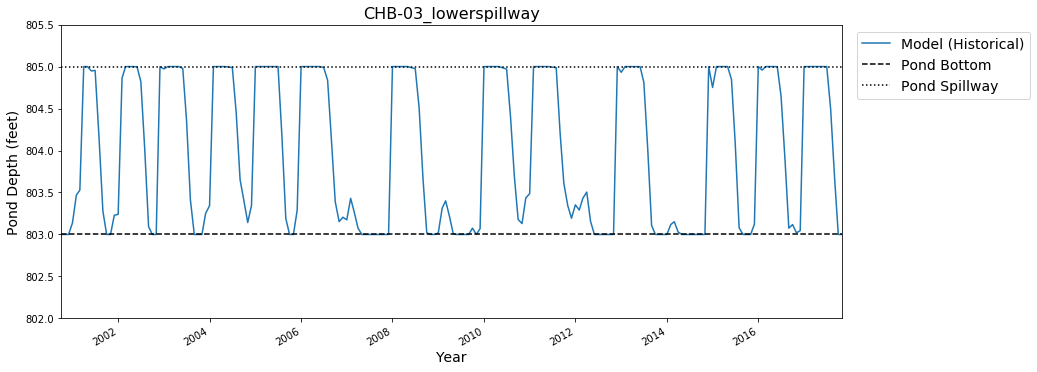

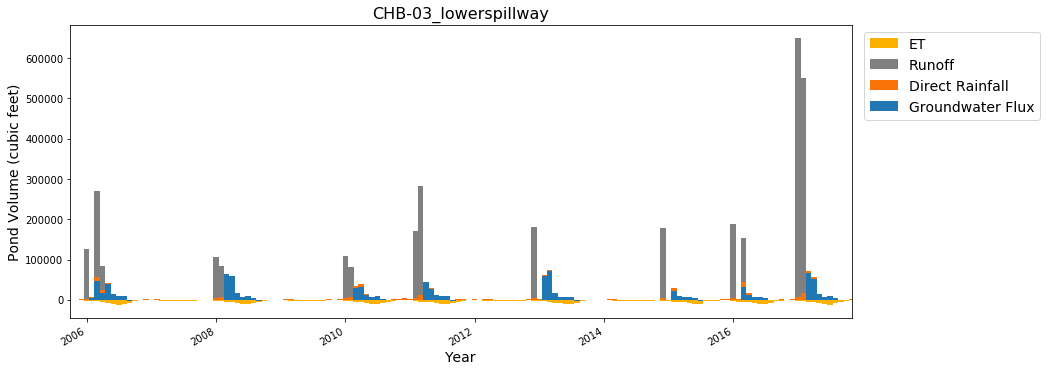

In [1]:

################### user inputs ###############################

plot_calibration_data = 'n' # toggle between 'y' and 'n' to show or not show cablibration data in timeseries plot

## specify the input filename of the main_inputs file; do not include file extension
master_input_filename = 'main_inputs_design_hist'





###############################################################
repo_folder = './'

import os
os.chdir(repo_folder)
import importlib


from pondit.load_data import *
from pondit.calc_ET_proj import *
from pondit.calc_model_proj import *
from pondit.plot_hydroperiod import *
from pondit.plot_model import *


import pandas
import numpy as np
# import matplotlib.pylab as plt
# import scipy.constants
# import scipy.optimize
# import datetime
# import scipy.ndimage.interpolation
# import statsmodels.api as sm
# import calendar

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


%matplotlib inline

folder_in = repo_folder + '/inputs/'
folder_out = repo_folder + '/results/'



### load input data common to all sites
scalars = pandas.read_csv(folder_in + master_input_filename + '.csv', index_col=0)

site_list = scalars.index

site_list = scalars.loc[scalars['status'] != 'done', :].index


for site in site_list:
#     scalars_hist = pandas.read_csv(folder_out + 'data/' + site + '_model_params_hist.csv', index_col=0)
    print(site)
    ##load data hist_model
    stage_storage, soils, data, last_hist_date, calib_data = load_data(scalars, site, folder_in)
    
    sws_calc_dict = {}
    
        
    ## calculate ET, using Blaney Criddle
    bc_calc = calc_ET_proj(data, scalars, site, repo_folder, last_hist_date)

    # calculate model
    sws_calc, out = calc_pondit_proj(bc_calc, scalars, site, stage_storage, soils, repo_folder)
    
    if plot_calibration_data == 'y':
        sws_calc = pandas.merge(sws_calc, calib_data[['calib_wse_ft']], right_index=True, left_on='date', how='outer')
        
    
    sws_calc.to_csv(folder_out + '/data/3_hist_design_model/'+ site + '_data_design_hist.csv')
    plot_model(sws_calc, scalars, site, folder_out) 
